In [86]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0, Deld=0.2, Dels=0, mu=2, t=1, inhomp=False, inhomi=True)

H = myModel.HBdG()

In [87]:
G = myModel.simple_stats()
print(G['avgap'])
H(1, 2)[8]

[2.03559633 1.59814139 1.41108895 1.59814139 2.03559633]


array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.21612092+0.j, -1.        +0.j,  0.        +0.j,  1.08060461+0.j,
       -2.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

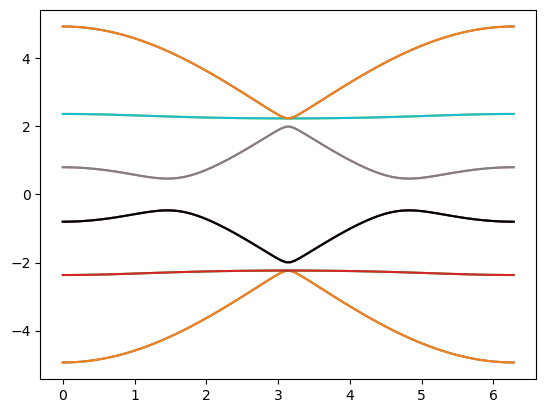

In [88]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
energies2 = myModel.solvHam(k, k)

plt.plot(k, energies)
plt.plot(k, energies2[5], color='black')

In [89]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [90]:
emax = np.amax(energies)
emax = emax+0.1*emax

In [91]:
G = myModel.simple_stats()
print(G['av'][6])

0.7055444767268206


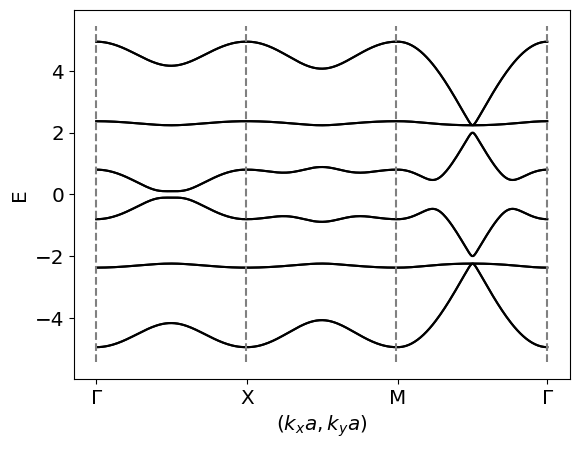

In [92]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies:
    plt.plot(p, i, color='black')


plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)

plt.savefig("Pictures/ESCpath.png")
plt.show()

In [93]:
H(1, 0)[11]

array([ 0. +0.j, -0.4+0.j,  1. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  2. +0.j, -2. +0.j])

In [94]:
k

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

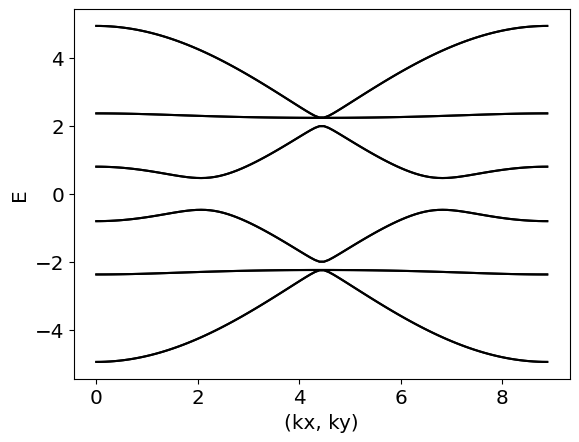

In [95]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [96]:
Ens = myModel.Es(k)

In [97]:
np.shape(Ens)

(12, 10100)

In [98]:
energies

array([[-4.9389074 , -4.93747374, -4.93317424, ..., -4.93317424,
        -4.93747374, -4.9389074 ],
       [-4.9389074 , -4.93747374, -4.93317424, ..., -4.93317424,
        -4.93747374, -4.9389074 ],
       [-2.36764476, -2.36743393, -2.36680365, ..., -2.36680365,
        -2.36743393, -2.36764476],
       ...,
       [ 2.36764476,  2.36743393,  2.36680365, ...,  2.36680365,
         2.36743393,  2.36764476],
       [ 4.9389074 ,  4.93747374,  4.93317424, ...,  4.93317424,
         4.93747374,  4.9389074 ],
       [ 4.9389074 ,  4.93747374,  4.93317424, ...,  4.93317424,
         4.93747374,  4.9389074 ]])

In [99]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

4.938907399816888

In [100]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [101]:
DOS1

array([5.75382266e-135, 3.14540813e-119, 1.86110124e-104, 1.19243192e-090,
       8.27773512e-078, 6.23028692e-066, 5.08873020e-055, 4.51560287e-045,
       4.36002996e-036, 4.59021048e-028, 5.28462824e-021, 6.68183024e-015,
       9.33996636e-010, 1.45911892e-005, 2.59786792e-002, 5.48287120e+000,
       1.50353569e+002, 6.85946492e+002, 9.73433973e+002, 9.95085112e+002,
       1.00951949e+003, 1.03195275e+003, 1.06052132e+003, 1.09538993e+003,
       1.13780651e+003, 1.19020863e+003, 1.25708947e+003, 1.34773527e+003,
       1.48883855e+003, 1.74864654e+003, 1.95472346e+003, 1.90884241e+003,
       1.63304096e+003, 1.30225924e+003, 1.11545759e+003, 9.89720178e+002,
       8.92339889e+002, 8.12425418e+002, 7.44548534e+002, 6.85513605e+002,
       6.33254777e+002, 5.86349798e+002, 5.43773305e+002, 5.04759151e+002,
       4.68718309e+002, 4.35187184e+002, 4.03793635e+002, 3.74233975e+002,
       3.46256680e+002, 3.19650458e+002, 2.94235383e+002, 2.69856290e+002,
       2.46377872e+002, 2

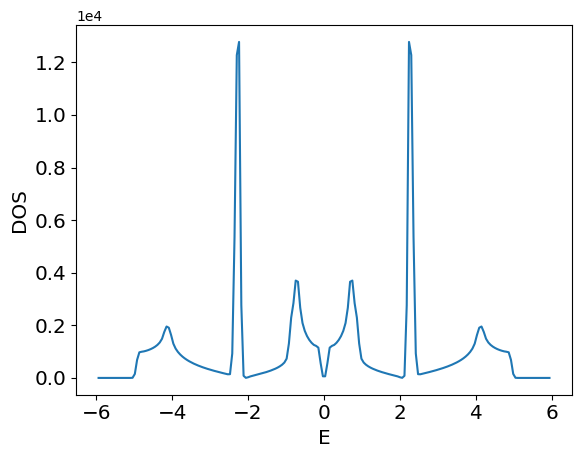

In [102]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()